In [1]:
import os # it is essential to read the files
import logging #
from tqdm import tqdm
from PIL import Image

In [2]:
# logging settings
logging.basicConfig(
    level=logging.INFO, format="%(asctime)s - %(levelname)s - %(message)s"
)

In [3]:
def check_is_dir(path):
    if not os.path.isdir(path):
        raise ValueError(f"Provided path: {path} is not a directory.")
    return True

In [4]:
def filter_images(list_of_files):
    valid_extensions = {".jpg", ".png", ".jpeg", ".webp"}
    return [
        file
        for file in list_of_files
        if any(file.endswith(ext) for ext in valid_extensions)
    ]

In [5]:
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

In [7]:
def read_images_from_dir(dir_path):
    check_is_dir(dir_path)
    files = os.listdir(dir_path)
    image_files = filter_images(files)
    image_paths = [os.path.join(dir_path, file) for file in image_files]
    images = [load_image(image_path) for image_path in tqdm(image_paths)]
    logging.info(f"Loaded {len(images)} images from {dir_path}")
    return images

In [8]:
loaded_images = read_images_from_dir("raw_images/bird")

  0%|          | 0/229 [00:00<?, ?it/s]

100%|██████████| 229/229 [00:05<00:00, 40.35it/s]
2024-07-19 03:42:26,257 - INFO - Loaded 229 images from raw_images/bird


In [9]:
def max_resolution_rescale(image, max_width, max_height):
    width, height = image.size
    if width > max_width or height > max_height:
        ratio = min(max_width / width, max_height / height)
        new_width = int(width * ratio)
        new_height = int(height * ratio)
        image = image.resize((new_width, new_height), Image.LANCZOS)
    return image

In [10]:
max_size = 1024

resized_images = list(
    map(lambda x: max_resolution_rescale(x, max_size, max_size), tqdm(loaded_images))
)

100%|██████████| 229/229 [00:03<00:00, 69.16it/s]


In [11]:
def min_resolution_filter(image, min_width, min_height):
    width, height = image.size
    return width >= min_width and height >= min_height

In [12]:
min_size = 224
filtered_images = list(
    filter(lambda x: min_resolution_filter(x, min_size, min_size), tqdm(resized_images))
)

100%|██████████| 229/229 [00:00<00:00, 977106.43it/s]


In [13]:
len(filtered_images)

228

Image Processing


In [14]:
import matplotlib.pyplot as plt

2024-07-19 04:40:16,816 - INFO - generated new fontManager


In [15]:
def plot_image(image):
    plt.imshow(image)
    plt.axis("off")
    plt.show()

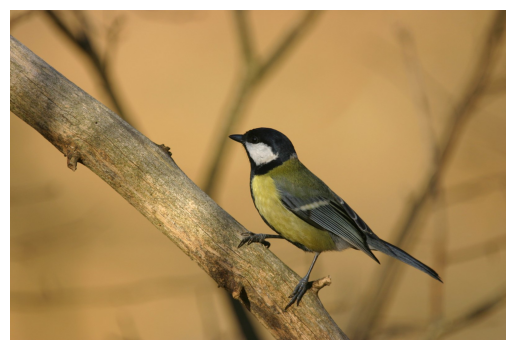

In [16]:
plot_image(filtered_images[14])

In [17]:
def center_crop(image, new_width, new_height):
    width, height = image.size
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    cropped_image = image.crop((left, top, right, bottom))
    logging.info(f"Center cropped image to {new_width}x{new_height}")
    return cropped_image

2024-07-19 04:44:44,856 - INFO - Center cropped image to 224x224


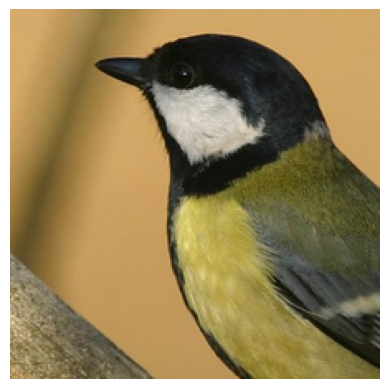

In [18]:
min_size = 224

plot_image(center_crop(filtered_images[14], min_size, min_size))

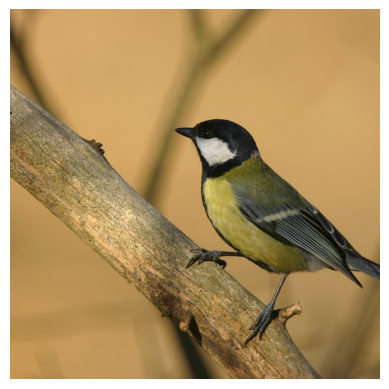

In [30]:
from smartcrop_module import detect

cropped_image = detect(filtered_images[14], square=True)
plot_image(cropped_image)


In [31]:
cropped_images = list(map(lambda x: detect(x, square=True), tqdm(filtered_images)))

100%|██████████| 228/228 [00:20<00:00, 10.95it/s]
